In [39]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [40]:
stock = pd.read_csv(r'NSE-TATAGLOBAL11.csv')
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [41]:
stock.shape

(1235, 8)

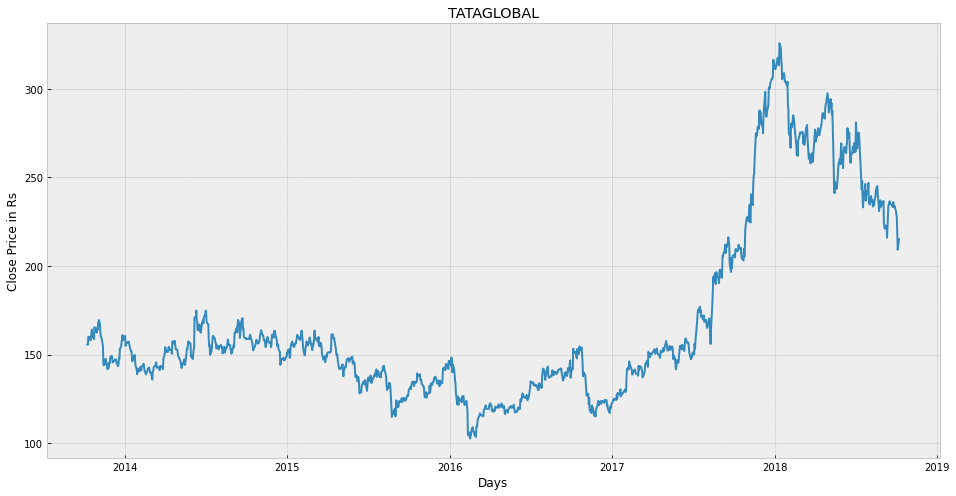

In [42]:
stock["Date"]=pd.to_datetime(stock.Date,format="%Y-%m-%d")
stock.index=stock['Date']
plt.figure(figsize=(16,8))
plt.title('TATAGLOBAL')
plt.xlabel('Days')
plt.ylabel('Close Price in Rs')
plt.plot(stock['Close'],label='Close Price')
plt.show()

In [43]:
stock = stock[['Close']]
stock.tail(4)

,Close
Date,
2013-10-11,160.05
2013-10-10,160.15
2013-10-09,155.55
2013-10-08,155.80


In [44]:
#Create a variable to predict ' x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
stock['Prediction'] = stock[['Close']].shift(-future_days)
stock.head(25)

,Close,Prediction
Date,,
2018-10-08,215.15,234.55
2018-10-05,209.20,233.35
2018-10-04,218.20,237.05
2018-10-03,227.60,231.00
2018-10-01,230.90,235.45
2018-09-28,233.75,240.55
2018-09-27,233.25,245.15
2018-09-26,234.25,243.00
2018-09-25,236.10,239.35


In [45]:
#Create the feature data set (X) and convert it to a numpy array and remove the last ' x' rows/days
X = np.array(stock.drop(['Prediction'],1))[:-future_days]
print(X)

[[215.15]
 [209.2 ]
 [218.2 ]
 ...
 [147.7 ]
 [143.95]
 [144.3 ]]


C:\Users\ashiv\AppData\Local\Temp\ipykernel_24324\2541080254.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(['Prediction'],1))[:-future_days]


In [46]:
#Create the targert data set(y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y= np.array(stock['Prediction'])[:-future_days]
print(y)

[234.55 233.35 237.05 ... 160.15 155.55 155.8 ]


In [47]:
#Split the data into 75% training and 25% testing
x_train , xtest, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [48]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train,y_train)


In [49]:
#Get the last 'x' rows of the feature data set
x_future = stock.drop(['Prediction'],1)[:-future_days]
x_future = x_future.head(future_days)
x_future = np.array(x_future)

x_future

C:\Users\ashiv\AppData\Local\Temp\ipykernel_24324\315571735.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = stock.drop(['Prediction'],1)[:-future_days]


array([[215.15],
       [209.2 ],
       [218.2 ],
       [227.6 ],
       [230.9 ],
       [233.75],
       [233.25],
       [234.25],
       [236.1 ],
       [233.3 ],
       [234.6 ],
       [234.9 ],
       [235.05],
       [236.6 ],
       [233.95],
       [222.65],
       [216.  ],
       [222.  ],
       [222.95],
       [221.05],
       [222.4 ],
       [223.7 ],
       [236.7 ],
       [234.3 ],
       [236.  ]])

In [50]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[164.2  206.9  164.2  231.   235.45 240.55 245.15 243.   209.45 237.55
 269.35 237.3  237.3  236.35 237.6  239.5  164.2  235.45 239.5  246.9
 239.5  242.25 239.1  236.9  209.45]

[210.66938904 205.13988783 213.50383924 222.23952183 225.30630401
 227.95488863 227.49022466 228.41955259 230.13880927 227.53669106
 228.74481737 229.02361575 229.16301494 230.60347324 228.14075421
 217.63934855 211.45931779 217.0352854  217.91814693 216.15242386
 217.40701657 218.61514288 230.69640603 228.46601899 230.04587648]


In [51]:
stock[:future_days]

,Close,Prediction
Date,,
2018-10-08,215.15,234.55
2018-10-05,209.20,233.35
2018-10-04,218.20,237.05
2018-10-03,227.60,231.00
2018-10-01,230.90,235.45
2018-09-28,233.75,240.55
2018-09-27,233.25,245.15
2018-09-26,234.25,243.00
2018-09-25,236.10,239.35


C:\Users\ashiv\AppData\Local\Temp\ipykernel_24324\604705302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


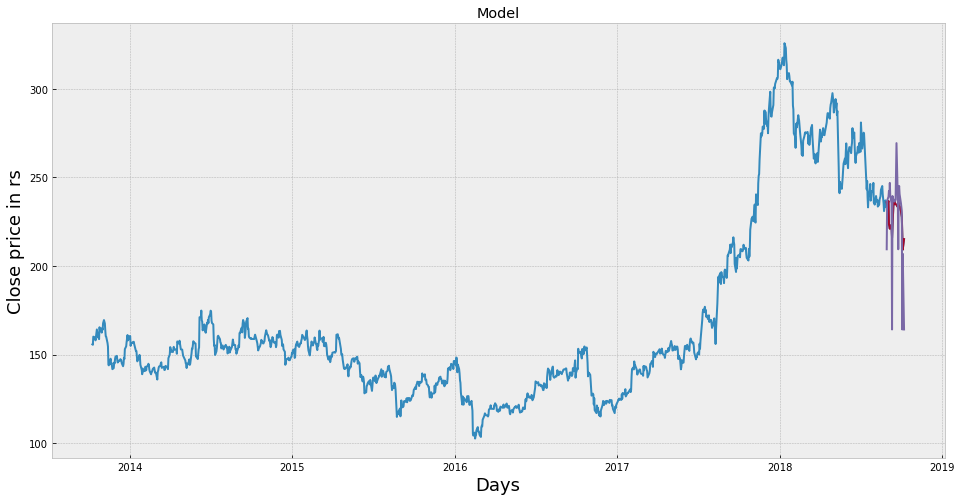

In [52]:
#visualize the data
predictions = tree_prediction

valid = stock[:future_days]
valid['Predictions']= predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close price in rs',fontsize=18)
plt.plot(stock['Close'])
plt.plot(valid[['Close','Predictions']])

plt.show()

C:\Users\ashiv\AppData\Local\Temp\ipykernel_24324\879900702.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


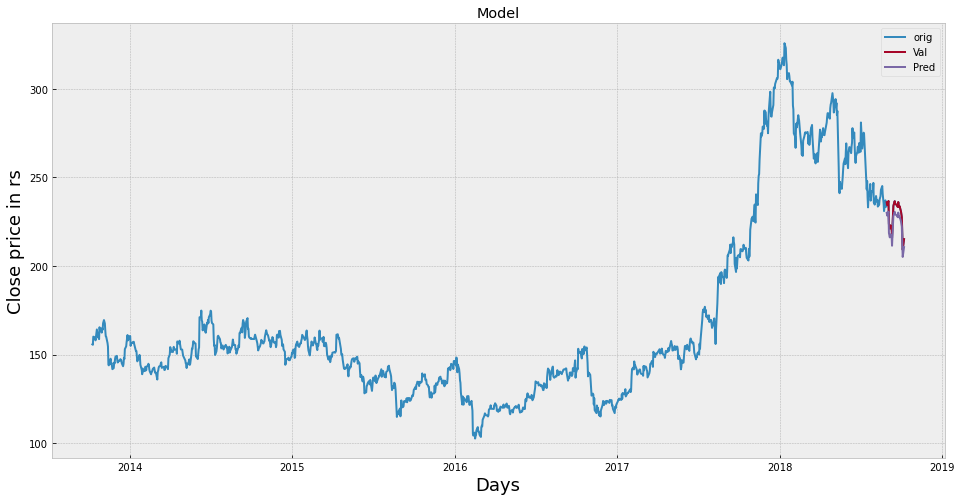

In [53]:
predictions = lr_prediction

valid = stock[:future_days]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close price in rs',fontsize=18)
plt.plot(stock['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['orig','Val','Pred'])
plt.show()